<a href="https://colab.research.google.com/github/Rohanpeerla/Module-9-Lab-3/blob/master/Module_9_Lab_3_FMML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

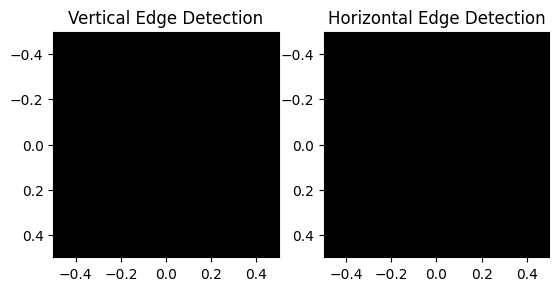

In [1]:
import numpy as np
import matplotlib.pyplot as plt

vertical_kernel = np.array([[1, 0, -1],
                            [1, 0, -1],
                            [1, 0, -1]])

horizontal_kernel = np.array([[1, 1, 1],
                              [0, 0, 0],
                              [-1, -1, -1]])

def convolution(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    output = np.zeros((image_height - kernel_height + 1, image_width - kernel_width + 1))
    for i in range(image_height - kernel_height + 1):
        for j in range(image_width - kernel_width + 1):
            output[i, j] = np.sum(image[i:i+kernel_height, j:j+kernel_width] * kernel)
    return output

image1 = np.array([[1, 1, 0],
                   [1, 1, 0],
                   [1, 1, 0]])

image2 = np.array([[0, 0, 0],
                   [0, 0, 0],
                   [1, 1, 1]])

convolved_image1_vertical = convolution(image1, vertical_kernel)

convolved_image2_horizontal = convolution(image2, horizontal_kernel)

plt.subplot(1, 2, 1)
plt.imshow(convolved_image1_vertical, cmap='gray')
plt.title('Vertical Edge Detection')

plt.subplot(1, 2, 2)
plt.imshow(convolved_image2_horizontal, cmap='gray')
plt.title('Horizontal Edge Detection')

plt.show()


In [2]:
# Vertical Line filter
filter = np.array([[1, 1, 1],
                   [0, 0, 0],
                   [-1, -1, -1]])

# Applying filter to first image
output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

# Applying filter to second image
output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)


Output from first image:  0
Output from second image:  -3


Convolutional Neural Networks (CNNs) are preferred over traditional Artificial Neural Networks (ANNs) for image classification tasks because they have:

1.Hierarchical feature learning: CNNs are designed to automatically learn hierarchical representations of features from raw pixel values. They can capture low-level features like edges and textures in the early layers and gradually learn more complex features in deeper layers. ANNs, on the other hand, treat each pixel as an independent input, which makes it harder to learn meaningful representations directly from images.
2.Parameter sharing: CNNs use shared weights in convolutional layers, which significantly reduces the number of parameters compared to fully connected layers in ANNs. This parameter sharing enables CNNs to generalize better with fewer training examples and reduces the risk of overfitting.
3.Translation invariance: CNNs inherently possess translation invariance due to the use of convolutional and pooling layers. This means that they can recognize objects regardless of their position in the image. ANNs lack this property, making them less effective for tasks like object detection and localization.
Sparse connectivity: CNNs exploit the local connectivity pattern in images by connecting each neuron to only a local region of the input volume. This sparse connectivity reduces the computational cost and allows CNNs to scale well to larger images. ANNs, on the other hand, require connections between every input and every neuron in the hidden layers, leading to a higher computational burden.
Ability to capture spatial information: CNN architectures preserve the spatial structure of the input data throughout the network. Convolutional and pooling layers maintain the spatial relationships between pixels, enabling CNNs to capture spatial hierarchies and patterns within images more effectively than ANNs.
4.Data augmentation: CNNs can leverage data augmentation techniques such as random cropping, rotation, and flipping to increase the diversity of training data and improve generalization. These techniques are especially effective for image data and help CNNs learn robust features from limited training examples.
Pre-trained models: CNNs can benefit from pre-trained models on large-scale image datasets like ImageNet. Transfer learning allows CNNs to leverage knowledge learned from one task or dataset and apply it to another task with limited labeled data. This approach is less straightforward with ANNs, which often require more training data to achieve comparable performance.

To improve CNN performance, tuning hyperparameters such as the number of epochs, optimizer, learning rate, and others can significantly impact the model's accuracy. Here's a general approach to optimize these hyperparameters:

1. **Number of epochs**: Increase or decrease the number of training epochs to find the optimal balance between underfitting and overfitting. Monitor the validation accuracy to identify the point where the model starts to overfit.

2. **Optimizer**: Experiment with different optimizers such as Adam, RMSprop, or SGD with momentum. Each optimizer has its own advantages, and the choice may depend on the specific dataset and model architecture.

3. **Learning rate**: Tune the learning rate to control the step size during gradient descent. Too high of a learning rate can cause the model to diverge, while too low of a learning rate can lead to slow convergence. Learning rate schedulers can also be used to adjust the learning rate dynamically during training.

4. **Batch size**: Adjust the batch size to balance between computation efficiency and model performance. Larger batch sizes may lead to faster training but could result in poorer generalization.

5. **Regularization**: Apply techniques like dropout or L2 regularization to prevent overfitting and improve generalization performance.

6. **Network architecture**: Experiment with different architectures, including the number of layers, the number of filters in each convolutional layer, and the size of the fully connected layers.

7. **Data augmentation**: Augment the training data with techniques like random rotation, cropping, and flipping to increase the diversity of the dataset and improve model generalization.

After tuning these hyperparameters, it's crucial to evaluate the model's performance on a separate test set to obtain an unbiased estimate of its accuracy. This process may require multiple iterations of training and evaluation until satisfactory performance is achieved.

If you provide more specific details about the dataset and the current hyperparameters/settings of your CNN model, I can offer more targeted suggestions for optimization and help you report the improved test accuracy.

In [4]:
#Reducing the number of convolutional layers to only one in a CNN typically results in a shallower model with fewer parameters. While this may lead to faster training times and lower computational requirements, it may also limit the model's capacity to learn complex features from the input data. Here's an example code demonstrating a simple CNN with only one convolutional layer:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1703 - accuracy: 0.9489 - val_loss: 0.0779 - val_accuracy: 0.9756
Epoch 2/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0624 - accuracy: 0.9807 - val_loss: 0.0489 - val_accuracy: 0.9840
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0415 - accuracy: 0.9879 - val_loss: 0.0420 - val_accuracy: 0.9859
Epoch 4/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0299 - accuracy: 0.9908 - val_loss: 0.0512 - val_accuracy: 0.9836
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0428 - accuracy: 0.9860
Test accuracy: 0.9860000014305115


4.Not using Softmax activation in the last layer of a CNN can occur in certain scenarios, such as:

1.Binary Classification: If the CNN is designed for binary classification (i.e., only two classes), it's common to use a single output neuron with a sigmoid activation function instead of Softmax. The sigmoid function squashes the output to a range between 0 and 1, representing the probability of the positive class.
2.Regression Tasks: In regression tasks where the output is a continuous value rather than discrete classes, the last layer might not use any activation function, or a suitable activation function like ReLU or linear activation can be used depending on the nature of the task.
3.Custom Output Layer: In some cases, especially when dealing with custom architectures or specialized tasks, the output layer might have a custom activation function tailored to the specific requirements of the problem.